In [1]:
import os
import csv
import vaex
import matplotlib
import pylab as p
from numpy import *
import pandas as pd
from tqdm import tqdm
import subprocess as sub
from matplotlib.backends.backend_pdf import PdfPages

## Create an input file for Rockstar from TGAS dataset (5 dimensions)

In [2]:
dt = vaex.open('/net/gaia/data/users/breddels/data/tgas/x_allwise_2mass_tycho2/tgas_x_allwise_2mass_tycho2_extra.hdf5')

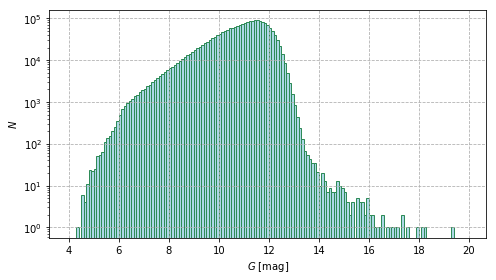

In [6]:
fig=p.figure(figsize=(7,4))
data = dt.evaluate('phot_g_mean_mag')
p.grid(ls='dashed')
p.hist(data, bins=arange(4,20,0.1), histtype='bar', edgecolor='seagreen', color='lightblue')
p.yscale('log')
# p.ylim(0,15000)
p.xlabel(r'$G$ [mag]'), p.ylabel(r'$N$')
fig.tight_layout()
# fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/magnitude.png', format='png')
p.show()

In [3]:
dt.select('(parallax_error/parallax <= 0.2) & (parallax >= 0)', name='parallax_cut')

In [4]:
dt.add_column(name='rockstar_id', f_or_array=arange(len(dt)))

In [5]:
# calculate cartesian properties (position, velocity)
dt.add_virtual_columns_spherical_to_cartesian(alpha='l', delta='b', distance='distance')
dt.add_virtual_columns_lbrvr_proper_motion2vcartesian(long_in='l', lat_in='b', distance='distance', pm_long='pm_l', pm_lat='pm_b', vr='0', vx='vx_tilde', vy='vy_tilde', vz='vz_tilde')

In [6]:
# column that we need (position, velocity, and id)
dt_input = dt.to_copy(column_names=['x', 'y', 'z', 'vx_tilde', 'vy_tilde', 'vz_tilde', 'rockstar_id'], virtual=True, selection='parallax_cut')
dt_input.column_names

['x', 'y', 'z', 'vx_tilde', 'vy_tilde', 'vz_tilde', 'rockstar_id']

In [7]:
# save into csv file for Rockstar
input_file = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_5d_xyz_cut.csv'
df_input = dt_input.to_pandas_df(column_names=dt_input.column_names)
df_input.to_csv(input_file, sep=' ', columns=dt_input.column_names, header=['#x', 'y', 'z', 'vx_tilde', 'vy_tilde', 'vz_tilde', 'rockstar_id'], index=False)

In [8]:
input_5d = pd.read_csv(input_file, sep=' ')

In [9]:
pd.read_csv('/net/virgo01/data/users/virgini/rockstar/RC3/input/input_5d_lb', sep=' ')

,#x,y,z,vx_tilda,vy_tilda,vz_tilda,rockstar_id
0,-0.103691,0.005905,-0.118281,-16.146353,-25.929090,12.860213,0
1,-0.169156,0.009113,-0.192453,25.202629,-58.136708,-24.904576,1
2,-0.208975,0.011755,-0.237978,-1.388403,-4.723127,0.985891,2
3,-0.287553,0.016276,-0.327636,13.931279,-33.474674,-13.889887,3
4,-0.417557,0.023790,-0.473927,2.831196,-6.003542,-2.795806,4
5,-0.076285,0.004374,-0.086522,35.776017,-10.524130,-32.075371,5
6,-0.116038,0.006688,-0.131486,-10.442249,-15.626773,8.420523,6
7,-0.316028,0.018416,-0.358527,14.732594,-17.382620,-13.879082,7
8,-0.106324,0.006337,-0.121032,-15.009708,-8.095630,12.761812,8
9,-0.393483,0.024624,-0.447053,18.240889,-68.834713,-19.846572,9


## Run Rockstar

See notebook : py-output-6-run-rockstar

## Crossmatch TGAS dataset and Rockstar result

In [ ]:
# data of rockstar experiment
# exp2_5d = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f80-n10-t70-5d-particles'
exp4_5d = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f80-n10-t70-5d-particles'
names = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'rs_id', 'as_int_id', 'int_id', 'ext_id']
de4_raw = vaex.from_ascii(exp4_5d, names=names)

# select only the real substructure
de4 = de4_raw.to_copy(selection='(as_int_id == int_id) & (ext_id != -1)')

# rename the column that we are going to use to make is short and handy
de4.rename_column(name='ext_id', new_name='exp4_5d')

# join the results to the original dataset
dt._join('rockstar_id', de4, 'rs_id', column_names=['exp4_5d'])

# convert apparent magnitude into absolute magnitude
# dt.add_virtual_column('G', 'phot_g_mean_mag+5*log10(parallax)-10')
# dt.add_virtual_column('K', 'ks_m+5*log10(parallax)-10')

## Crossmatch Rockstar result with catalogue

In [ ]:
# make a csv file consisting ext_id, median position (l, b) and median distance!

output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/crossmatch-exp4-5d'

# write the header in the file
with open(output, 'w') as f:
    writer = csv.writer(f, delimiter=',', lineterminator='\n')
    writer.writerow(['#sub_id', 'n', 'med_l', 'med_b', 'med_d', 'std_d'])
    f.close()
    
# write the data in the file
with open(output, 'a') as f:
    writer = csv.writer(f, delimiter=',', lineterminator='\n')
    for i in tqdm(unique(dt.data.exp4_5d[~isnan(dt.data.exp4_5d)]).astype(int), desc='Loading'):
        dt.select('exp4_5d == %s' %i, name='sub')
        vx_sigma_tilde = dt.evaluate('vx_tilde', selection='sub').std()
        vy_sigma_tilde = dt.evaluate('vy_tilde', selection='sub').std()
        vz_sigma_tilde = dt.evaluate('vz_tilde', selection='sub').std()
        sigma_tilde = sqrt((vx_sigma_tilde**2)+(vy_sigma_tilde**2)+(vz_sigma_tilde**2))
        if sigma_tilde <= 3:
            n = dt.selected_length(selection='sub')
            med_l = median(dt.evaluate('l', selection='sub'))
            med_b = median(dt.evaluate('b', selection='sub'))
            med_d = median(dt.evaluate('distance', selection='sub'))
            std_d = std(dt.evaluate('distance', selection='sub'))
            writer.writerow([i, n, med_l, med_b, med_d, std_d])
    f.close()

In [ ]:
df_out = pd.read_csv('/net/virgo01/data/users/virgini/rockstar/RC3/output/crossmatch-exp4-5d')
len(df_out)

In [ ]:
df_oc = pd.read_csv('/net/virgo01/data/users/virgini/rockstar/RC3/output/crossmatch-daml-exp2-5d')

In [ ]:
df = df_oc
for i in range(len(df)):
    if abs(df.Dist[i]*1e-3 - df.med_l[i]) <= (df.std_d[i]*1e3):
        print(df.Cluster[i], 'Sub', df['#sub_id'][i], ' ', round(df.Separation[i]/3600, 2), 'degree   ',  round(abs(distance_oc[i] - df.med_l[i]),2), 'pc')

In [ ]:
df_ob = pd.read_csv('/net/virgo01/data/users/virgini/rockstar/RC3/output/crossmatch-md-exp2-5d')

In [ ]:
df_ob[df_ob['#sub_id'] == k].head()

In [ ]:
df_oc[df_oc['#sub_id'] == k].head()

In [ ]:
arrow_size=10

for i in [k]:
    dt.select('exp2_5d == %s' %i, name='sub')
    n = dt.selected_length(selection='sub')
    l = dt.evaluate('l', selection='sub')
    b = dt.evaluate('b', selection='sub')
    pm_l = dt.evaluate('pm_l', selection='sub')
    pm_b = dt.evaluate('pm_b', selection='sub')
    parallax = dt.evaluate('parallax', selection='sub')
    
    fig = p.figure(figsize=(14, 20))
    gs1 = p.GridSpec(nrows=3, ncols=2, wspace=0, width_ratios=[3,1])
    gs2 = p.GridSpec(nrows=3, ncols=2)
    gs3 = p.GridSpec(nrows=3, ncols=2)
    
    ax = fig.add_subplot(gs1[0])
    p.title(('Substructure %s' %i), fontsize='x-large')
    p.scatter(l, b, label='tgas (%s stars)' %n)
    for j in range(dt.selected_length(selection='sub')):
        p.arrow(l[j], b[j], pm_l[j]/arrow_size, pm_b[j]/arrow_size)
    p.xlabel(r'$l$ (deg)', fontsize='x-large'), p.ylabel(r'$b$ (deg)', fontsize='x-large')
    p.xticks(fontsize='x-large'), p.yticks(fontsize='x-large')
    p.legend(loc='upper left', fontsize='large')

    fig.add_subplot(gs1[1])
    dt.scatter('parallax', 'b', s=1, selection='(l >= %s) & (l <= %s) & (b >= %s) & (b <= %s)' %(min(l), max(l), min(b), max(b)), c='lightgrey', length_check=False)
    dt.scatter('parallax', 'b', s=7, selection='sub')
    p.xlim(0,10)
    p.xlabel(r'$\pi$ (mas)', fontsize='x-large'), p.ylabel(' ') 
    p.xticks(fontsize='x-large')
    p.yticks([])
    
    fig.add_subplot(gs2[2])
    dt.scatter('pm_l', 'pm_b', s=1, selection='(l >= %s) & (l <= %s) & (b >= %s) & (b <= %s)' %(min(l), max(l), min(b), max(b)), c='lightgrey', length_check=False)
    dt.scatter('pm_l', 'pm_b', s=7, selection='sub')
    p.xlim(-100,100), p.ylim(-100,100)
    p.xlabel(r'$\mu_l$ (mas/yr)', fontsize='x-large'), p.ylabel(r'$\mu_b$ (mas/yr)', fontsize='x-large')
    p.xticks(fontsize='x-large'), p.yticks(fontsize='x-large')
    p.legend(loc='upper left', fontsize='large')
    
    fig.add_subplot(gs2[3])
    dt.scatter('G - K', 'G', s=1, selection='(l >= %s) & (l <= %s) & (b >= %s) & (b <= %s)' %(min(l), max(l), min(b), max(b)), c='lightgrey', length_check=False)
    dt.scatter('G - K', 'G', s=7, selection='(sub)')
    dt.scatter('G - K', 'G', s=7, selection='(sub) & (parallax_error>=0.4)')
    p.xlim(-1,5), p.ylim(9, -5)
    p.xlabel('G - K', fontsize='x-large'), p.ylabel('G', fontsize='x-large')
    p.xticks(fontsize='x-large'), p.yticks(fontsize='x-large')
    
    fig.add_subplot(gs3[4])
    dt.plot1d('parallax_error', limits='minmax', selection='sub')
    p.xlabel(r'$\sigma_{\pi}$', fontsize='x-large'), p.ylabel(r'$N$', fontsize='x-large')
    p.xticks(fontsize='x-large'), p.yticks(fontsize='x-large')

#     fig.tight_layout(rect=[0.5,0.5,0.95,0.95])
#     fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/5d-1.pdf', format='pdf')
    
    p.show()

In [ ]:
output

In [ ]:
        # median position on the sky
        l_med = median(dt.evaluate('l', selection='sub'))
        b_med = median(dt.evaluate('b', selection='sub'))
        pm_l_med = median(dt.evaluate('pm_l', selection='sub'))
        pm_b_med = median(dt.evaluate('pm_b', selection='sub'))

        # radius containing 100% and 68% of members
        D = dt.evaluate('arctan2(sqrt((cos(deg2rad(b))*sin(abs(deg2rad(l)-%s)))**2+\
                       (cos(%s)*sin(deg2rad(b))-sin(%s)*cos(deg2rad(b))*cos(abs(deg2rad(l)-%s)))**2),\
                       (sin(%s)*sin(deg2rad(b))+cos(%s)*cos(deg2rad(b))*cos(abs(deg2rad(l)-%s))))'\
                       %(deg2rad(l_med), deg2rad(b_med), deg2rad(b_med), deg2rad(l_med), deg2rad(b_med),\
                       deg2rad(b_med),deg2rad(l_med)), selection='sub')
        R = sort(D)
        r = max(R)
        A = int(0.68*len(R))
        a = R[A-1]

        # define selection in TGAS dataset based on position in l and b (and positive distance)
        dt.select('(arctan2(sqrt((cos(deg2rad(b))*sin(abs(deg2rad(l)-%s)))**2+\
                 (cos(%s)*sin(deg2rad(b))-sin(%s)*cos(deg2rad(b))*cos(abs(deg2rad(l)-%s)))**2),\
                 (sin(%s)*sin(deg2rad(b))+cos(%s)*cos(deg2rad(b))*cos(abs(deg2rad(l)-%s)))) <= %s)\
                 & (distance>=0)' %(deg2rad(l_med), deg2rad(b_med), deg2rad(b_med), deg2rad(l_med),\
                 deg2rad(b_med), deg2rad(b_med), deg2rad(l_med), r), name='position')

        # define selection in TGAS dataset based on proper motion
        dt.select('(pm_l >= %s) & (pm_l <= %s) & (pm_b >= %s) & (pm_b <= %s)'\
                  %(str('%.55f' %min(pm_l)), str('%.55f' %max(pm_l)), str('%.55f' %min(pm_b)), str('%.55f' %max(pm_b))),\
                  name='motion')

        # define selection in TGAS dataset based on parallax
        dt.select('(abs(parallax - %s) / sqrt(parallax_error**2 + %s)) <= 1' \
                  %(str('%.55f' %median(parallax)), str('%.55f' %(std(parallax)**2))), name='par')

        l_tgas = dt.evaluate('l', selection='position')
        b_tgas = dt.evaluate('b', selection='position')
        
        n_member = dt.selected_length(selection='(position) & (motion) & (par)')
        l_member = dt.evaluate('l', selection='(position) & (motion) & (par)')
        b_member = dt.evaluate('b', selection='(position) & (motion) & (par)')
        pm_l_member = dt.evaluate('pm_l', selection='(position) & (motion) & (par)')
        pm_b_member = dt.evaluate('pm_b', selection='(position) & (motion) & (par)')
        
        arr1 = ds.evaluate('b', selection='sub')
        arr2 = dt.evaluate('b', selection='(position) & (motion) & (par)')
        n_add = n-len(intersect1d(arr1, arr2))
        
print('Substructure', flag, '|', n_member+n_add, 'stars')

## Crossmatch 6d-55 subs and 5d-exp2

In [ ]:
columns = ['flag', 'l', 'med_l', 'b', 'med_b', 'n_star', '#sub_id', 'n', 'd', 'med_d', 'Separation']
df = pd.read_csv('/net/virgo01/data/users/virgini/rockstar/RC3/output/crossmatch-55-exp4-5d', usecols = columns)

In [ ]:
df[df.Separation < 0.01]

In [ ]:
i = ds.data.exp3 == 5
j = dt.data.exp4_5d == 2221

arr1 = ds.data.l[i]
arr2 = dt.data.l[j]
len(arr1), len(arr2), intersect1d(arr1, arr2)

In [ ]:
p.figure(figsize=(10,3))
p.subplot(121)
p.hist(ds.data.pm_l[i], alpha=0.5)
p.hist(dt.data.pm_l[j], alpha=0.5)
p.subplot(122)
p.hist(ds.data.pm_b[i], alpha=0.5)
p.hist(dt.data.pm_b[j], alpha=0.5)
p.show()

In [ ]:
sort(ds.data.pm_b[i])

In [ ]:
p.figure(figsize=(10,3))
p.subplot(121)
p.hist(ds.data.l[i], alpha=0.5)
p.hist(dt.data.l[j], alpha=0.5)
p.subplot(122)
p.hist(ds.data.b[i], alpha=0.5)
p.hist(dt.data.b[j], alpha=0.5)
p.show()


## Comparison between actual properties versus converted properties in Cartesian ($x, \tilde{x}$)

In [3]:
tgas_rave = '/net/virgo01/data/users/virgini/rockstar/RC3/data/data_6d_cut.hdf5'
ds = vaex.open(tgas_rave)
len(ds)

108916

In [4]:
ds

In [26]:
ds.selected_length(selection='(parallax >= 0) & (parallax_error/parallax <= 0.2)')

103417

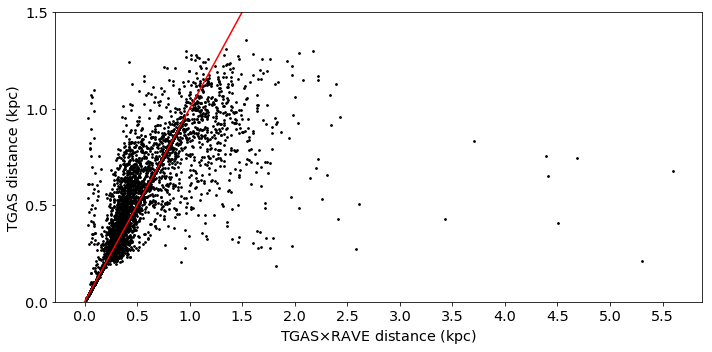

In [19]:
# d6 = ds.evaluate('1/best_parallax', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)')
# d5 = ds.evaluate('1/parallax', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)')
# p.hist(d6, alpha=0.5, bins=arange(0,10,1))
# p.hist(d5, alpha=0.5, bins=arange(0,10,1))
# p.yscale('log')
# p.show()
# d6.shape, d5.shape

fig = p.figure(figsize=(10,5))
line1 = ds.scatter('1/best_parallax', '1/parallax', s=3, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
# line2 = ds.scatter('1/best_parallax', '1/parallax', s=3, c='green', selection='(parallax >= 0) & (parallax_error/parallax <= 0.2)', length_check=False)
p.xlabel(r'TGAS$\times$RAVE distance (kpc)', fontsize='x-large'), p.ylabel('TGAS distance (kpc)', fontsize='x-large')
# p.legend([line1, line2], [r'$\delta_{\omega} \leq 0.3 $', r'$\delta_{\omega} \leq 0.2$'], markerscale=2, fontsize='x-large')
p.xticks(arange(0,6,0.5), fontsize='x-large'), p.yticks(arange(0,2,0.5), fontsize='x-large')
p.plot([0,2], [0,2], c='red')
p.ylim(0,1.5)
fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/d-d_tilde2.png', format='png')
p.show()

In [20]:
# add column of cartesian tilde (use tgas distance only (1/tgas_parallax) and vr=0)
ds.add_virtual_columns_spherical_to_cartesian(alpha='l', delta='b', distance='1/parallax', xname='x_tilde', yname='y_tilde', zname='z_tilde')
ds.add_virtual_columns_lbrvr_proper_motion2vcartesian(long_in='l', lat_in='b', distance='1/parallax', pm_long='pm_l', pm_lat='pm_b', vr='0', vx='vx_tilde', vy='vy_tilde', vz='vz_tilde')

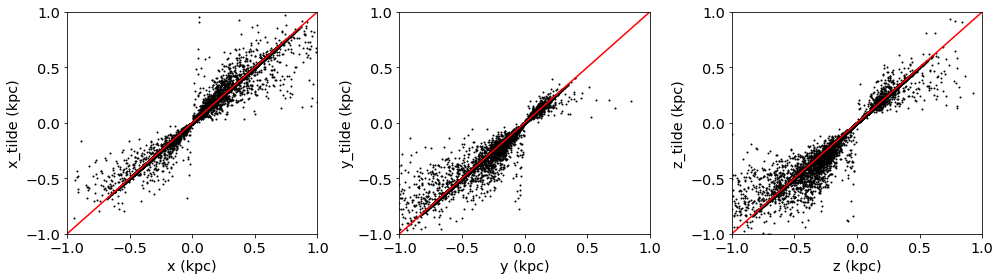

In [81]:
fig = p.figure(figsize=(14,4))
gs = p.GridSpec(nrows=1, ncols=3)

p.subplot(gs[0])
ds.scatter('x', 'x_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-4,4], [-4,4], c='red'), p.xlim(-1,1), p.ylim(-1,1)
p.xlabel('x (kpc)', fontsize='x-large'), p.ylabel('x_tilde (kpc)', fontsize='x-large')
p.xticks(arange(-1,1.5,0.5), fontsize='x-large'), p.yticks(arange(-1,1.5,0.5), fontsize='x-large')

p.subplot(gs[1])
ds.scatter('y', 'y_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-4,4], [-4,4], c='red'), p.xlim(-1,1), p.ylim(-1,1)
p.xlabel('y (kpc)', fontsize='x-large'), p.ylabel('y_tilde (kpc)', fontsize='x-large')
p.xticks(arange(-1,1.5,0.5), fontsize='x-large'), p.yticks(arange(-1,1.5,0.5), fontsize='x-large')

p.subplot(gs[2])
ds.scatter('z', 'z_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-4,4], [-4,4], c='red'), p.xlim(-1,1), p.ylim(-1,1)
p.xlabel('z (kpc)', fontsize='x-large'), p.ylabel('z_tilde (kpc)', fontsize='x-large')
p.xticks(arange(-1,1.5,0.5), fontsize='x-large'), p.yticks(arange(-1,1.5,0.5), fontsize='x-large')

fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/x-x_tilde2.png', format='png')
p.show()

In [22]:
len(ds)

108916

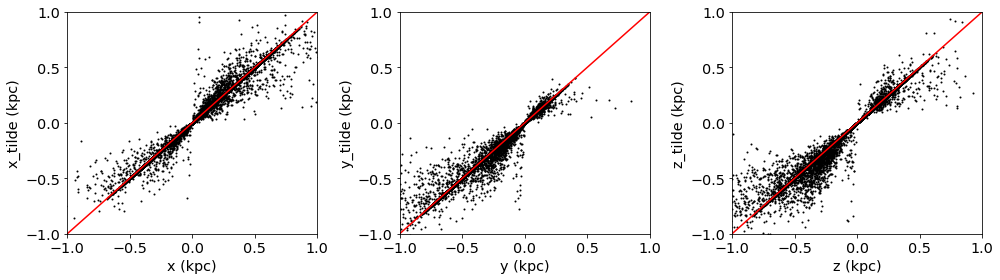

In [21]:
fig = p.figure(figsize=(14,4))
gs = p.GridSpec(nrows=1, ncols=3)

p.subplot(gs[0])
ds.scatter('x', 'x_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-4,4], [-4,4], c='red'), p.xlim(-1,1), p.ylim(-1,1)
p.xlabel('x (kpc)', fontsize='x-large'), p.ylabel('x_tilde (kpc)', fontsize='x-large')
p.xticks(arange(-1,1.5,0.5), fontsize='x-large'), p.yticks(arange(-1,1.5,0.5), fontsize='x-large')

p.subplot(gs[1])
ds.scatter('y', 'y_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-4,4], [-4,4], c='red'), p.xlim(-1,1), p.ylim(-1,1)
p.xlabel('y (kpc)', fontsize='x-large'), p.ylabel('y_tilde (kpc)', fontsize='x-large')
p.xticks(arange(-1,1.5,0.5), fontsize='x-large'), p.yticks(arange(-1,1.5,0.5), fontsize='x-large')

p.subplot(gs[2])
ds.scatter('z', 'z_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-4,4], [-4,4], c='red'), p.xlim(-1,1), p.ylim(-1,1)
p.xlabel('z (kpc)', fontsize='x-large'), p.ylabel('z_tilde (kpc)', fontsize='x-large')
p.xticks(arange(-1,1.5,0.5), fontsize='x-large'), p.yticks(arange(-1,1.5,0.5), fontsize='x-large')

fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/x-x_tilde2.png', format='png')
p.show()

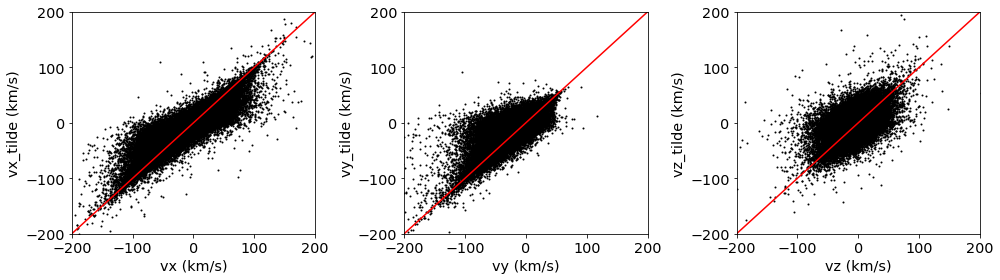

In [83]:
fig = p.figure(figsize=(14,4))
gs = p.GridSpec(nrows=1, ncols=3)
p.subplot(gs[0])
ds.scatter('vx', 'vx_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-400,400], [-400,400], c='red'), p.xlim(-200,200), p.ylim(-200,200)
p.xlabel('vx (km/s)', fontsize='x-large'), p.ylabel('vx_tilde (km/s)', fontsize='x-large')
p.xticks(arange(-200,201,100), fontsize='x-large'), p.yticks(arange(-200,201,100), fontsize='x-large')

p.subplot(gs[1])
ds.scatter('vy', 'vy_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-400,400], [-400,400], c='red'), p.xlim(-200,200), p.ylim(-200,200)
p.xlabel('vy (km/s)', fontsize='x-large'), p.ylabel('vy_tilde (km/s)', fontsize='x-large')
p.xticks(arange(-200,201,100), fontsize='x-large'), p.yticks(arange(-200,201,100), fontsize='x-large')

p.subplot(gs[2])
ds.scatter('vz', 'vz_tilde', s=1, c='black', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)', length_check=False)
p.plot([-400,400], [-400,400], c='red'), p.xlim(-200,200), p.ylim(-200,200)
p.xlabel('vz (km/s)', fontsize='x-large'), p.ylabel('vz_tilde (km/s)', fontsize='x-large')
p.xticks(arange(-200,201,100), fontsize='x-large'), p.yticks(arange(-200,201,100), fontsize='x-large')

fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/v-v_tilde.png', format='png')
p.show()

In [ ]:
d6 = ds.evaluate('vx', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)')
d5 = ds.evaluate('vx_tilde', selection='(parallax >= 0) & (parallax_error/parallax <= 0.3)')
difference = zeros(len(d6))
for i in range(len(d6)):
    difference[i] = abs(d6[i]-d5[i])

In [ ]:
len(difference[difference <= 1])/len(ds)*100